In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


READ the dataset

In [2]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',
                 encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
1403509,4,2054888341,Sat Jun 06 08:17:01 PDT 2009,NO_QUERY,jawaheralsayegh,At the movies with friends &lt;3
830036,4,1557255810,Sun Apr 19 02:57:51 PDT 2009,NO_QUERY,VeeIchik,@theonenonlysah ur awesome
837308,4,1558733990,Sun Apr 19 09:14:59 PDT 2009,NO_QUERY,rachmurrayX,take me on the flooooor
289911,0,1995182128,Mon Jun 01 13:04:48 PDT 2009,NO_QUERY,saracoole,I wish the economy wld turn around so I cld ge...
185815,0,1968157422,Fri May 29 20:52:15 PDT 2009,NO_QUERY,_MandyLynn_,"I got to see my good friend Matt 2night,who I ..."


Data Analysis 


In [3]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
print('length of data is', len(df))

length of data is 1600000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [7]:
df['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

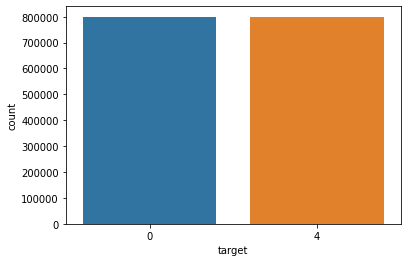

In [8]:
import seaborn as sns
sns.countplot(data=df,x='target')

Data Preprocessing 

In [9]:
data=df[['text','target']]
data.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [10]:
data['target'] = data['target'].replace(4,1) # 1 positive sentiment
data['target'].value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    800000
1    800000
Name: target, dtype: int64

In [11]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]#Separating positive and negative tweets
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]
dataset = pd.concat([data_pos, data_neg])
dataset.shape # 20000 each +ve & -ve sentiment

(40000, 2)

In [12]:
dataset.head()

,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1


MAking sentiments in lower case

In [13]:
dataset['text']=dataset['text'].str.lower()
dataset.head()

,text,target
800000,i love @health4uandpets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@darealsunisakim thanks for the twitter add, s...",1
800003,being sick can be really cheap when it hurts t...,1
800004,@lovesbrooklyn2 he has that effect on everyone,1


In [14]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

Remove stopword

In [15]:
# STOPWORDS = set(stopwordlist)
# def cleaning_stopwords(text):
#     return " ".join([word for word in str(text).split() if word not in STOPWORDS])
# dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
# dataset['text'].head()

In [16]:
from nltk.corpus import stopwords

def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [17]:
df['text'] = df['text'].apply(remove_stopwords)

Cleaning and removing punctuations

In [18]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off this weekend work trip to ma...
19996                            one more day of holidays 
19997    feeling so down right now  i hate you damn hum...
19998    geezi hv to read the whole book of personality...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

Cleaning and removing repeating characters

In [19]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    not much time off this weekend work trip to ma...
19996                            one more day of holidays 
19997    feeling so down right now  i hate you damn hum...
19998    geezi hv to read the whole book of personality...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

Cleaning and removing URL’s

In [20]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time off this weekend work trip to ma...
19996                            one more day of holidays 
19997    feeling so down right now  i hate you damn hum...
19998    geezi hv to read the whole book of personality...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

Cleaning and removing Numeric numbers

In [21]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time off this weekend work trip to ma...
19996                            one more day of holidays 
19997    feeling so down right now  i hate you damn hum...
19998    geezi hv to read the whole book of personality...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

Getting tokenization of tweet text

In [22]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\s+', gaps = True)
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)

In [23]:
dataset['text'].tail()

19995    [not, much, time, off, this, weekend, work, tr...
19996                       [one, more, day, of, holidays]
19997    [feeling, so, down, right, now, i, hate, you, ...
19998    [geezi, hv, to, read, the, whole, book, of, pe...
19999    [i, threw, my, sign, at, donnie, and, he, bent...
Name: text, dtype: object

In [24]:
dataset['text'].head()

800000     [i, love, healthuandpets, u, guys, r, the, best]
800001    [im, meeting, up, with, one, of, my, besties, ...
800002    [darealsunisakim, thanks, for, the, twitter, a...
800003    [being, sick, can, be, really, cheap, when, it...
800004    [lovesbrooklyn, he, has, that, effect, on, eve...
Name: text, dtype: object

Applying Stemming

In [25]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000     [i, love, healthuandpets, u, guys, r, the, best]
800001    [im, meeting, up, with, one, of, my, besties, ...
800002    [darealsunisakim, thanks, for, the, twitter, a...
800003    [being, sick, can, be, really, cheap, when, it...
800004    [lovesbrooklyn, he, has, that, effect, on, eve...
Name: text, dtype: object

Applying Lemmatizer

In [26]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

800000     [i, love, healthuandpets, u, guys, r, the, best]
800001    [im, meeting, up, with, one, of, my, besties, ...
800002    [darealsunisakim, thanks, for, the, twitter, a...
800003    [being, sick, can, be, really, cheap, when, it...
800004    [lovesbrooklyn, he, has, that, effect, on, eve...
Name: text, dtype: object

In [27]:
dataset.head()

,text,target
800000,"[i, love, healthuandpets, u, guys, r, the, best]",1
800001,"[im, meeting, up, with, one, of, my, besties, ...",1
800002,"[darealsunisakim, thanks, for, the, twitter, a...",1
800003,"[being, sick, can, be, really, cheap, when, it...",1
800004,"[lovesbrooklyn, he, has, that, effect, on, eve...",1


Separating input feature and label

In [28]:
dataset[dataset['target']==0]['text']

0        [switchfoot, httptwitpiccomzl, a, s, a, bummer...
1        [is, upset, that, he, cant, update, his, faceb...
2        [kenichan, i, dived, many, times, for, the, ba...
3        [my, whole, body, feels, itchy, and, like, its...
4        [nationwideclass, no, its, not, behaving, at, ...
                               ...                        
19995    [not, much, time, off, this, weekend, work, tr...
19996                       [one, more, day, of, holidays]
19997    [feeling, so, down, right, now, i, hate, you, ...
19998    [geezi, hv, to, read, the, whole, book, of, pe...
19999    [i, threw, my, sign, at, donnie, and, he, bent...
Name: text, Length: 20000, dtype: object

Plot a cloud of words for negative tweets

(-0.5, 1599.5, 799.5, -0.5)

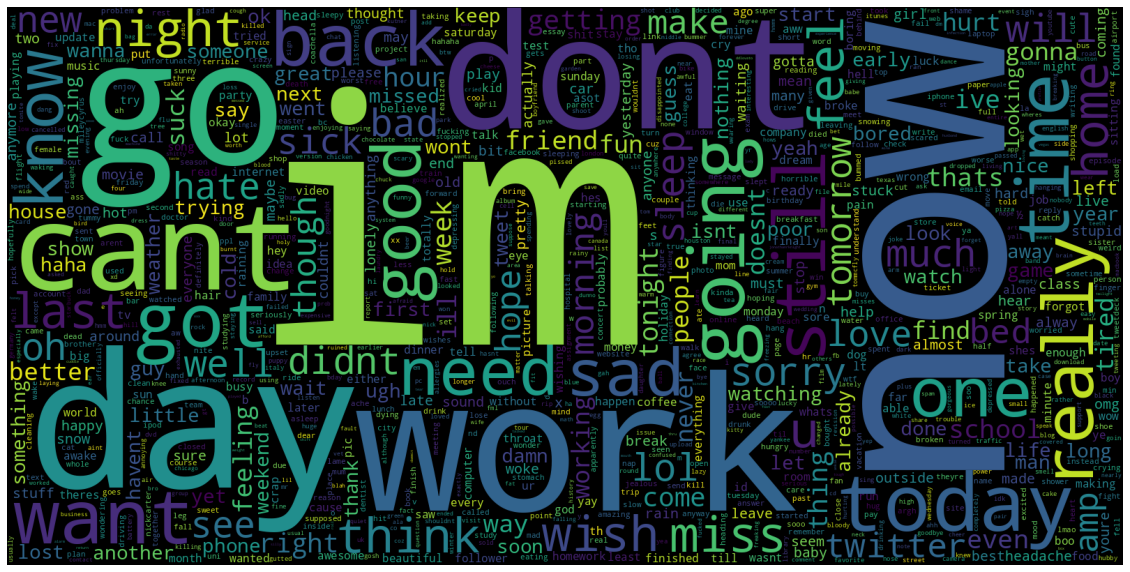

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
data_neg = dataset[dataset['target']==0]['text'].apply(lambda x: ' '.join(x) )
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.axis('off')

Plot a cloud of words for positive tweets

(-0.5, 1599.5, 799.5, -0.5)

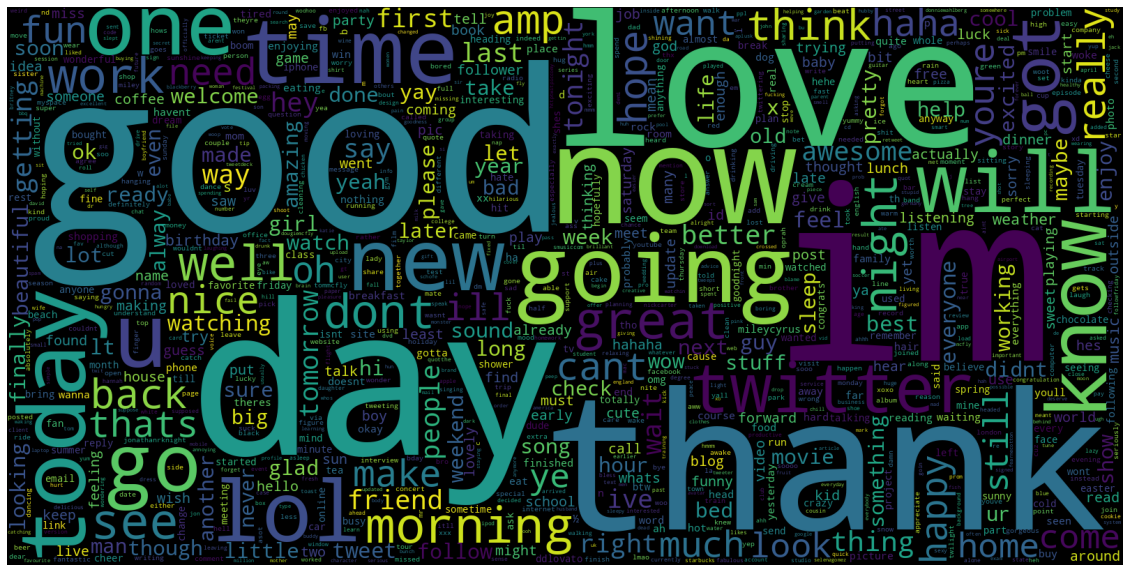

In [30]:
data_neg = dataset[dataset['target']==1]['text'].apply(lambda x: ' '.join(x) )
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.axis('off')

In [31]:
new_data=dataset
new_data['text'] = dataset['text'].apply(lambda x: ' '.join(x) )
new_data.head()

,text,target
800000,i love healthuandpets u guys r the best,1
800001,im meeting up with one of my besties tonight c...,1
800002,darealsunisakim thanks for the twitter add sun...,1
800003,being sick can be really cheap when it hurts t...,1
800004,lovesbrooklyn he has that effect on everyone,1


In [32]:
X=new_data.text
y=new_data.target


Splitting our data into Train and Test Subset

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10,
                                                    random_state =0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(40000,)
(36000,)
(4000,)


Transforming Dataset using TF-IDF Vectorizer

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  5000


In [35]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(36000, 5000)
(4000, 5000)


Classification model

In [36]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix
test_acc=accuracy_score(y_test,y_pred)
print(test_acc)
cfm=confusion_matrix(y_test,y_pred)
print(cfm)


0.77925
[[1515  488]
 [ 395 1602]]


<AxesSubplot:>

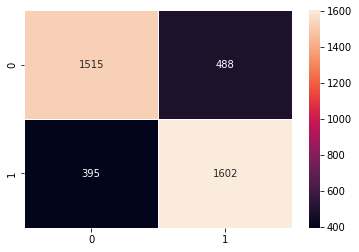

In [38]:
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

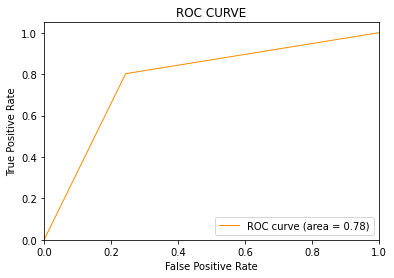

In [39]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()